### To Import all necessary libaries :

In [99]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for plots
sns.set(style="whitegrid")


### To Load the datasets :


In [100]:
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv(r"C:\Users\User\Desktop\ABIGAIL\pizza_types.csv", encoding='latin 1')


In [101]:
orders.head(10)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
5,6,2015-01-01,12:29:36
6,7,2015-01-01,12:50:37
7,8,2015-01-01,12:51:37
8,9,2015-01-01,12:52:01
9,10,2015-01-01,13:00:15


In [102]:
 order_details.head(10)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
5,6,2,thai_ckn_l,1
6,7,3,ital_supr_m,1
7,8,3,prsc_argla_l,1
8,9,4,ital_supr_m,1
9,10,5,ital_supr_m,1


In [103]:
 pizzas.head(10)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
5,cali_ckn_l,cali_ckn,L,20.75
6,ckn_alfredo_s,ckn_alfredo,S,12.75
7,ckn_alfredo_m,ckn_alfredo,M,16.75
8,ckn_alfredo_l,ckn_alfredo,L,20.75
9,ckn_pesto_s,ckn_pesto,S,12.75


In [104]:
pizza_types.head(10)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


### To Merge order_details with orders:


In [105]:
df = pd.merge(order_details, orders, on='order_id')


### To Merge with pizzas to get size and price:

In [106]:
df = pd.merge(df, pizzas, on='pizza_id')

### To Merge with pizza_types to get name and category:

In [107]:
df = pd.merge(df, pizza_types, on='pizza_type_id')


### To Convert date and time to datetime object:


In [108]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

### To Create a datetime column for easier analysis


In [109]:
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))


In [110]:
df.head(10)


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,datetime
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-02 12:22:46
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 14:22:10
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 16:54:54
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-04 20:55:29
5,716,314,hawaiian_m,1,2015-01-06,12:11:58,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-06 12:11:58
6,806,351,hawaiian_m,1,2015-01-06,17:37:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-06 17:37:29
7,856,377,hawaiian_m,1,2015-01-07,12:03:18,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-07 12:03:18
8,1263,558,hawaiian_m,1,2015-01-09,20:51:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-09 20:51:10
9,1312,580,hawaiian_m,1,2015-01-10,13:56:01,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-10 13:56:01


# RECOMMENDED ANALYSIS

### 1. TOTAL REVENUE/SALES

In [111]:
df['total_price'] = df['quantity'] * df['price']
total_sales = df['total_price'].sum()
print(f" The Total Revenue was ${total_sales:,.2f}")


 The Total Revenue was $817,860.05


### 2. TOTAL QUANTITY SOLD

In [112]:
total_quantity = df['quantity'].sum()
print(f"The Total Quantity Sold was {total_quantity}")


The Total Quantity Sold was 49574


### 3. TOTAL ORDERS

In [113]:
 df["order_id"].value_counts()


order_id
18845    21
10760    21
13906    15
14304    15
17464    15
         ..
11184     1
11805     1
12261     1
12423     1
21282     1
Name: count, Length: 21350, dtype: int64

##### The Total Orders was 21350


### 4. PIZZA TYPES SOLD

In [114]:
pizza_type_count = df['pizza_type_id'].nunique()
print(f" The total Pizza Types Sold was {pizza_type_count}")


 The total Pizza Types Sold was 32


### 5. AVERAGE PIZZA PRICE

In [115]:
average_price = df['price'].mean()
print(f"The Average Pizza Price is ${average_price:.2f}")


The Average Pizza Price is $16.49


### 6. PEAK HOUR OF THE DAY

In [116]:

df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

hourly_sales = df.groupby('hour')['total_price'].sum()

peak_hour = hourly_sales.idxmax()
peak_sales = hourly_sales.max()

print(f"Peak hour of the day is {peak_hour}:00 with total sales of ${peak_sales:,.2f}")


Peak hour of the day is 12:00 with total sales of $111,877.90


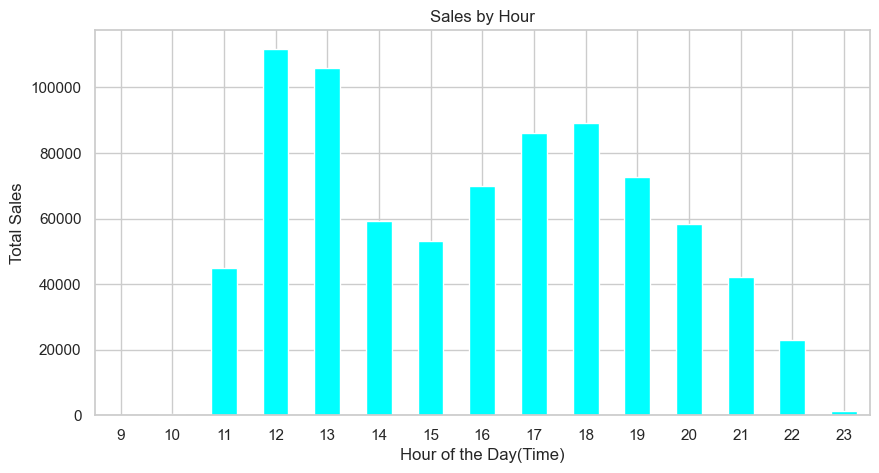

In [117]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
hourly_sales = df.groupby('hour')['total_price'].sum()

plt.figure(figsize=(10,5))
hourly_sales.plot(kind='bar', color='cyan')
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day(Time)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


### 7. TOTAL SALES MADE ON EACH DAY OF THE WEEK

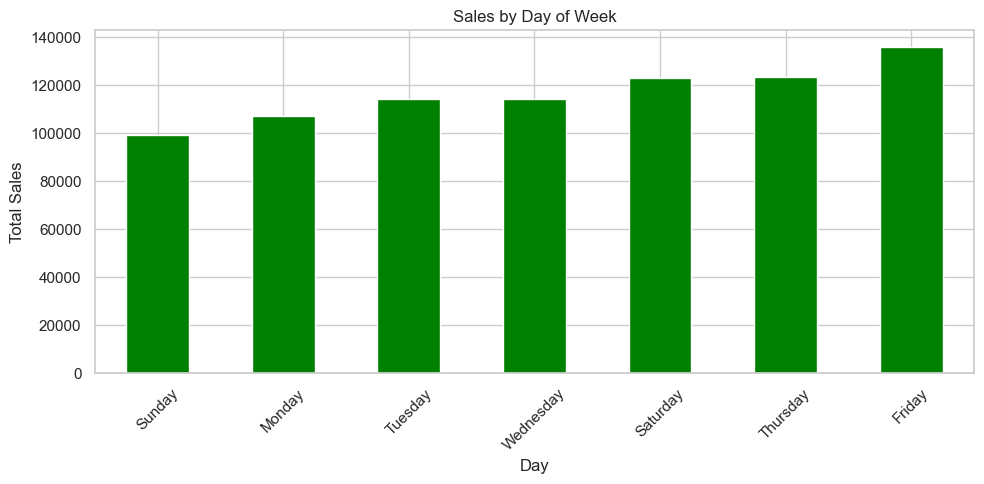

Day with Highest Sales: Friday


In [118]:
df['day_of_week'] = df['date'].dt.day_name()
sales_by_day = df.groupby('day_of_week')['total_price'].sum().sort_values(ascending=True)

plt.figure(figsize=(10,5))
sales_by_day.plot(kind='bar', color='green')
plt.title('Sales by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Day with Highest Sales:", sales_by_day.idxmax())


### 8. TOP 5 BESTSELLING PIZZAS

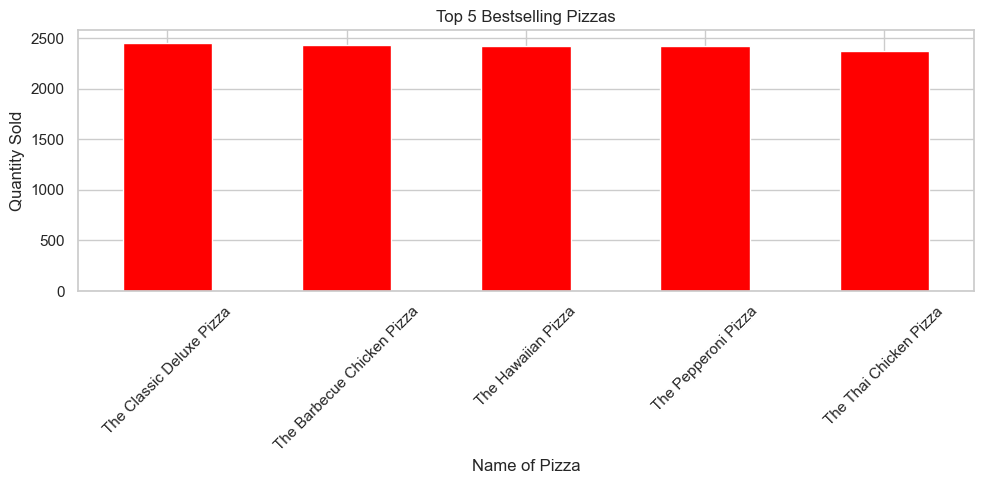

In [119]:
top_pizzas = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
top_pizzas.plot(kind='bar', color='red')
plt.title('Top 5 Bestselling Pizzas')
plt.ylabel('Quantity Sold')
plt.xlabel('Name of Pizza')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 9. Noticable Trend

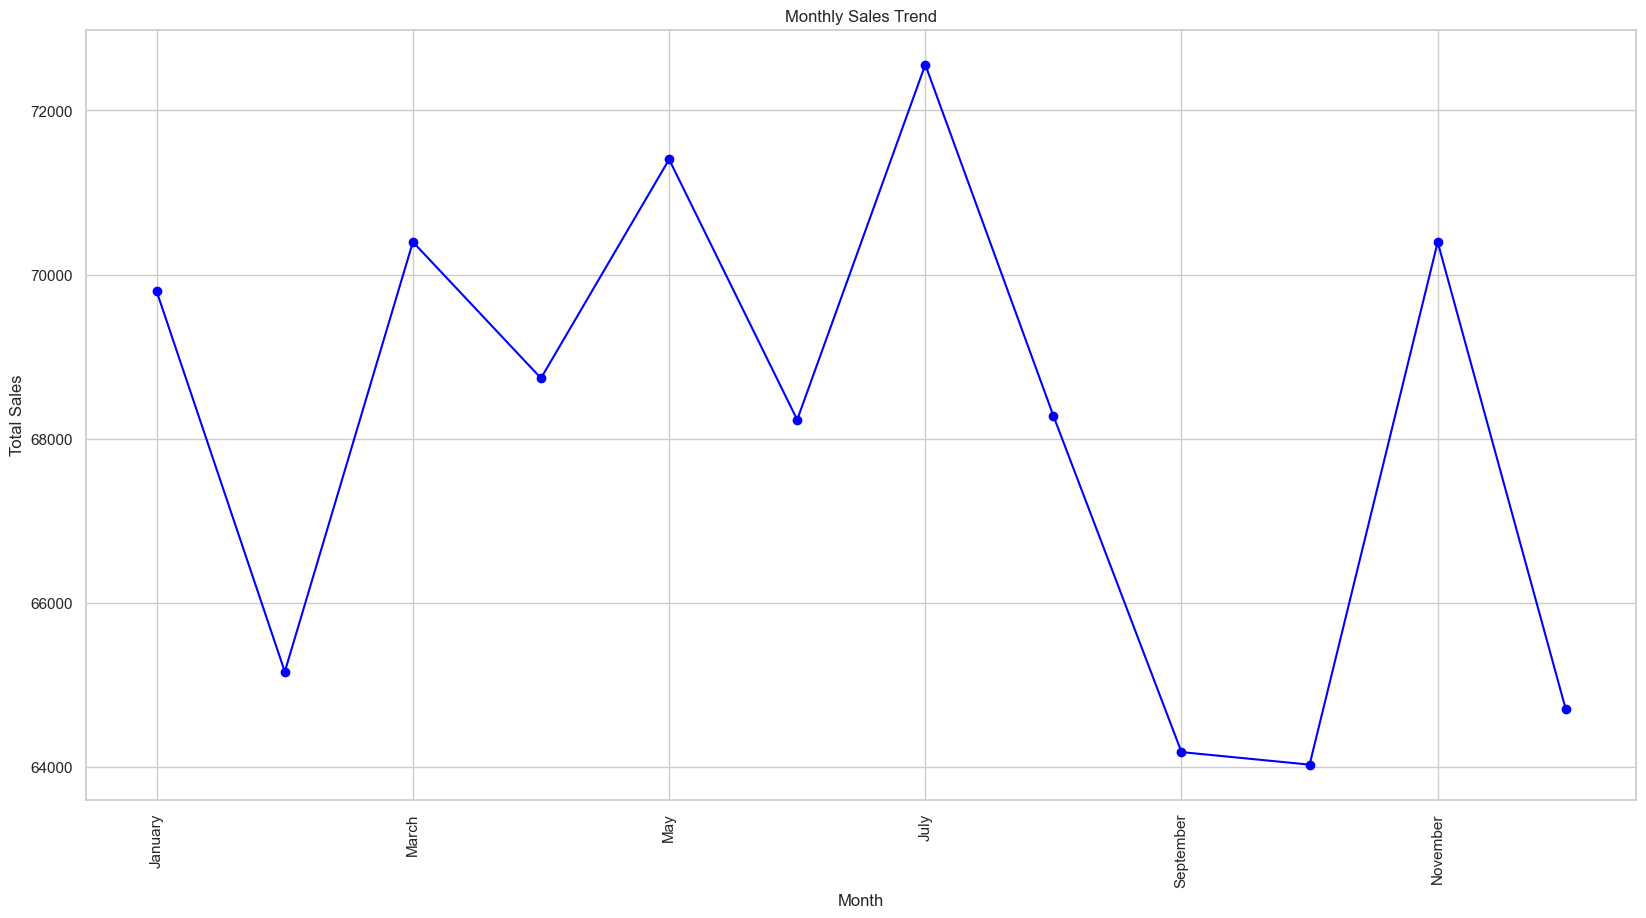

In [120]:
df['month'] = df['date'].dt.month_name()
monthly_sales = df.groupby('month')['total_price'].sum()
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(ordered_months)

plt.figure(figsize=(20,10))
monthly_sales.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


### 📊 Monthly Sales Trend 

- **Highest Sales:** July
- **Lowest Sales:** October
- **Sales Pattern:** Fluctuates throughout the year with no consistent upward or downward trend.
- **Recovery:** Sales rise again in November and drops in december
- **Insight:** 
  - July's strong performance suggests effective promotions or seasonal demand — consider replicating those strategies.


### 10. Underperforming Pizza

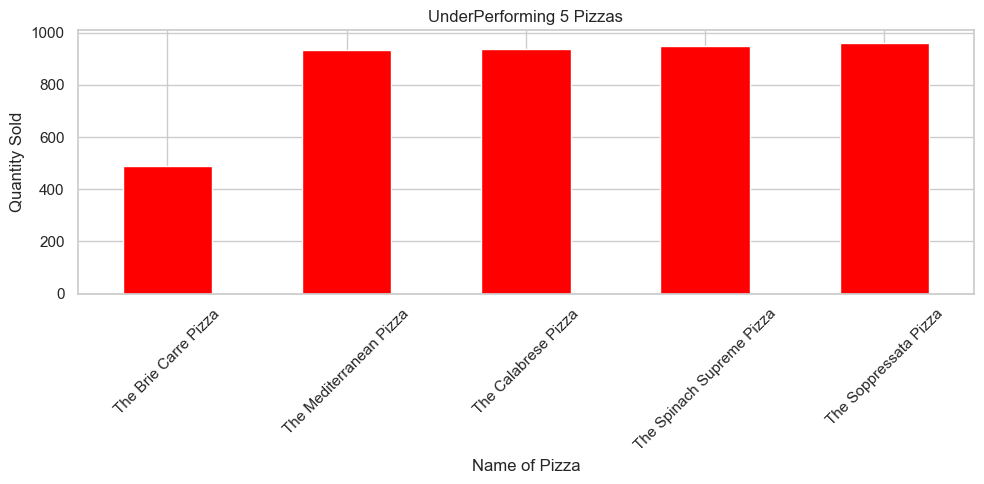

In [121]:
low_sales = df.groupby('name')['quantity'].sum().sort_values().head(5)

plt.figure(figsize=(10,5))
low_sales.plot(kind='bar', color='red')
plt.title('UnderPerforming 5 Pizzas')
plt.ylabel('Quantity Sold')
plt.xlabel('Name of Pizza')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
